### threshold random walk

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def step():
    return 1 if random.random()>0.5 else -1

def walk(n):
    x=np.zeros(n)
    dx=1/n
    for i in range(n-1):
        x_new=x[i]+dx*step()
        if x_new>5e-3:
            x[i+1]=0
        else:
            x[i+1]=x_new
    return x    

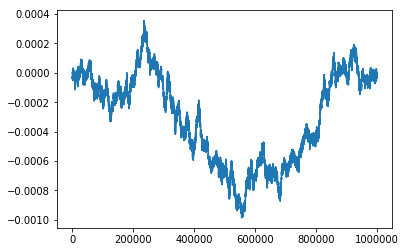

In [3]:
N=1000000
x=walk(N)
plt.plot(x)

In [4]:
%timeit -r 2 walk(N)

474 ms ± 755 µs per loop (mean ± std. dev. of 2 runs, 1 loop each)


### threshold random walk with `numba`

In [5]:
from numba import jit

In [6]:
@jit(nopython=True)
def step_numba():
    return 1 if random.random()>0.5 else -1

@jit(nopython=True)
def walk_numba(n):
    x=np.zeros(n)
    dx=1/n
    for i in range(n-1):
        x_new=x[i]+dx*step_numba()
        if x_new>5e-3:
            x[i+1]=0
        else:
            x[i+1]=x_new
    return x    

In [7]:
%timeit -r 2 walk_numba(N)

20.1 ms ± 6.33 µs per loop (mean ± std. dev. of 2 runs, 100 loops each)


### brownian random walk with `np.cumsum()`

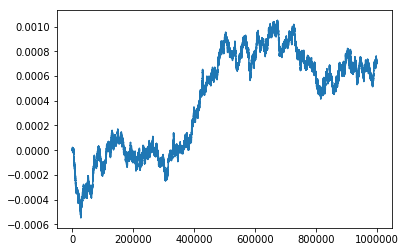

In [8]:
steps=np.random.choice([-1, 1], size=(N, )) / N
x = np.cumsum(steps)
plt.plot(x)